In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
def load_data(file_path):
    return pd.read_csv('Students_data.csv')

# Split data into features and labels, then into training and testing sets
def split_data(data, label_column, test_size=0.3, random_state=42):
    X = data.drop(columns=['ID', label_column])
    y = data[label_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train a logistic regression model
def train_model(X_train, y_train, max_iter=1000):
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    return model

# Evaluate the model and compute performance metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    return {
        "train_conf_matrix": train_conf_matrix,
        "test_conf_matrix": test_conf_matrix,
        "train_metrics": (train_precision, train_recall, train_f1),
        "test_metrics": (test_precision, test_recall, test_f1)
    }

# Display results
def display_results(metrics):
    train_precision, train_recall, train_f1 = metrics['train_metrics']
    test_precision, test_recall, test_f1 = metrics['test_metrics']

    print("Training Confusion Matrix:\n", metrics['train_conf_matrix'])
    print(f"Training Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1-Score: {train_f1:.2f}")

    print("\nTest Confusion Matrix:\n", metrics['test_conf_matrix'])
    print(f"Test Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1-Score: {test_f1:.2f}")

    # Check for overfitting or underfitting
    if train_f1 > test_f1:
        if train_f1 - test_f1 > 0.1:
            print("\nThe model may be overfitting.")
        else:
            print("\nThe model is well-fit.")
    else:
        print("\nThe model may be underfitting.")

# Main function to coordinate the process
def main(file_path, label_column):
    data = load_data(file_path)

    X_train, X_test, y_train, y_test = split_data(data, label_column)

    model = train_model(X_train, y_train)

    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)

    display_results(metrics)

# Example usage
file_path = 'Students_data.csv'
label_column = 'y'
main(file_path, label_column)


Training Confusion Matrix:
 [[23  3  6]
 [ 5 12  4]
 [ 3  1 16]]
Training Precision: 0.71, Recall: 0.70, F1-Score: 0.70

Test Confusion Matrix:
 [[12  5  6]
 [ 3  0  1]
 [ 0  3  2]]
Test Precision: 0.61, Recall: 0.44, F1-Score: 0.50

The model may be overfitting.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load the dataset
def load_data(file_path):
    return pd.read_csv('Students_data.csv')

# Split the data into training and testing sets
def split_data(data, label_column, test_size=0.3, random_state=42):
    X = data.drop(columns=['ID', label_column])
    y = data[label_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train the Linear Regression model
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate the model using various metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "r2": r2
    }

# Display evaluation results and performance
def display_results(metrics):
    print(f"MSE: {metrics['mse']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"MAPE: {metrics['mape']:.2%}")
    print(f"R² Score: {metrics['r2']:.2f}")

    if metrics['r2'] > 0.75:
        print("The model performs well with a high R² score.")
    elif 0.5 < metrics['r2'] <= 0.75:
        print("The model has moderate performance.")
    else:
        print("The model may be underperforming.")

# Main function to coordinate the process
def main(file_path, label_column):
    data = load_data(file_path)

    X_train, X_test, y_train, y_test = split_data(data, label_column)

    model = train_linear_model(X_train, y_train)

    metrics = evaluate_model(model, X_test, y_test)

    display_results(metrics)

# Example usage
file_path = 'Students_data.csv'
label_column = 'Measure'
main(file_path, label_column)


MSE: 35.15
RMSE: 5.93
MAPE: 6.06%
R² Score: 0.61
The model has moderate performance.


In [ ]:
data

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,0,1,1,73.47,64,81,87,60,74,71,60,0,0,0,3,0
1,1142,0,0,1,71.22,57,50,51,51,55,62,61,3,0,0,2,0
2,1143,0,0,2,74.56,47,48,71,60,61,68,64,4,0,0,0,1
3,1144,0,0,1,72.89,46,72,38,60,29,54,51,5,0,0,0,0
4,1145,0,0,1,70.11,49,45,63,60,66,66,61,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,0,0,1,88.34,87,83,92,98,93,86,90,1,1,1,0,1
101,1242,1,1,1,89.84,98,77,95,98,96,88,100,17,1,1,0,1
102,1243,1,1,1,88.82,83,80,91,98,93,95,71,2,1,1,0,2
103,1244,0,1,1,86.60,92,82,91,99,94,82,78,14,1,1,0,2


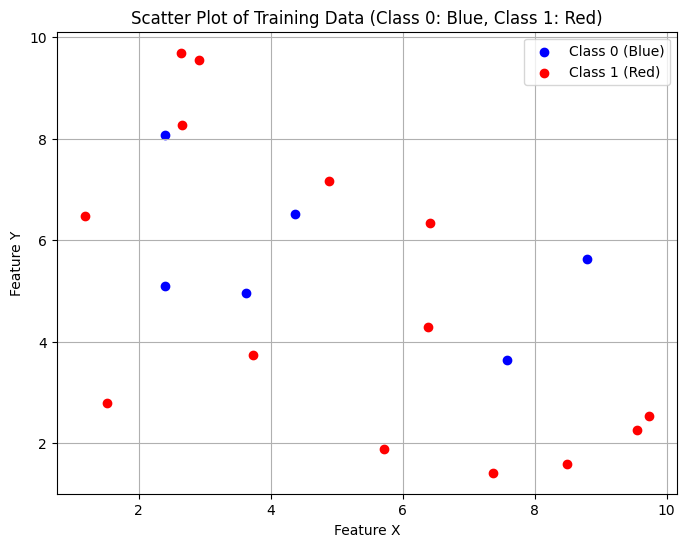

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random data
def generate_data(seed=42, size=20):
    np.random.seed(seed)
    X = np.random.uniform(1, 10, size)
    Y = np.random.uniform(1, 10, size)
    classes = np.random.choice([0, 1], size=size)
    return X, Y, classes

# Function to plot the scatter plot with different classes
def plot_scatter(X, Y, classes):
    plt.figure(figsize=(8, 6))

    # Scatter plot for Class 0
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')

    # Scatter plot for Class 1
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data (Class 0: Blue, Class 1: Red)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to coordinate data generation and plotting
def main():
    X, Y, classes = generate_data(seed=42, size=20)
    plot_scatter(X, Y, classes)

# Example usage
main()


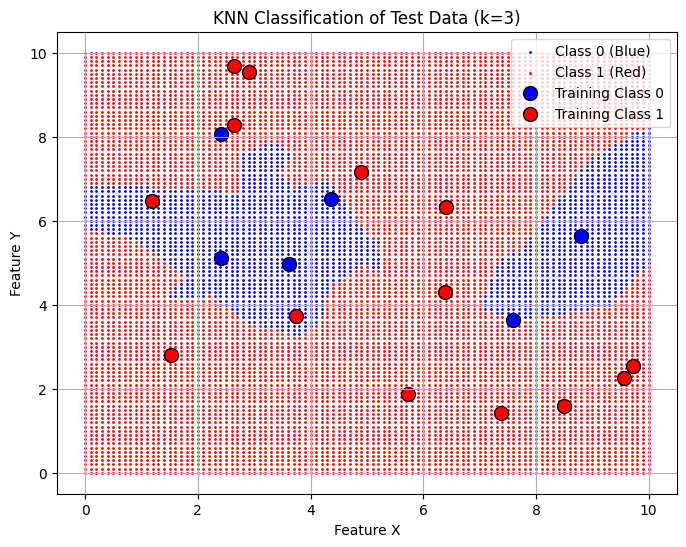

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to generate random training data
def generate_train_data(seed=42, size=20):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size)
    Y_train = np.random.uniform(1, 10, size)
    classes_train = np.random.choice([0, 1], size=size)
    return X_train, Y_train, classes_train

# Function to generate test data grid
def generate_test_data(x_range=(0, 10.1, 0.1), y_range=(0, 10.1, 0.1)):
    x_test_range = np.arange(*x_range)
    y_test_range = np.arange(*y_range)
    X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
    X_test_flat = X_test.ravel()
    Y_test_flat = Y_test.ravel()
    return X_test_flat, Y_test_flat

# Function to train KNN model
def train_knn(X_train, Y_train, classes_train, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    train_data = np.column_stack((X_train, Y_train))
    knn.fit(train_data, classes_train)
    return knn

# Function to predict classes for test data
def predict_knn(knn, X_test_flat, Y_test_flat):
    test_data = np.column_stack((X_test_flat, Y_test_flat))
    predicted_classes = knn.predict(test_data)
    return predicted_classes

# Function to plot the classification result
def plot_knn(X_test_flat, Y_test_flat, predicted_classes, X_train, Y_train, classes_train):
    plt.figure(figsize=(8, 6))

    # Plot predicted class areas
    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0],
                color='blue', label='Class 0 (Blue)', s=1)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1],
                color='red', label='Class 1 (Red)', s=1)

    # Plot training data
    plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0],
                color='blue', edgecolor='black', label='Training Class 0', marker='o', s=100)
    plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1],
                color='red', edgecolor='black', label='Training Class 1', marker='o', s=100)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('KNN Classification of Test Data (k=3)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to coordinate the process
def main():
    X_train, Y_train, classes_train = generate_train_data(seed=42, size=20)

    X_test_flat, Y_test_flat = generate_test_data(x_range=(0, 10.1, 0.1), y_range=(0, 10.1, 0.1))

    knn = train_knn(X_train, Y_train, classes_train, n_neighbors=3)

    predicted_classes = predict_knn(knn, X_test_flat, Y_test_flat)

    plot_knn(X_test_flat, Y_test_flat, predicted_classes, X_train, Y_train, classes_train)

# Example usage
main()


NameError: name 'X_train' is not defined

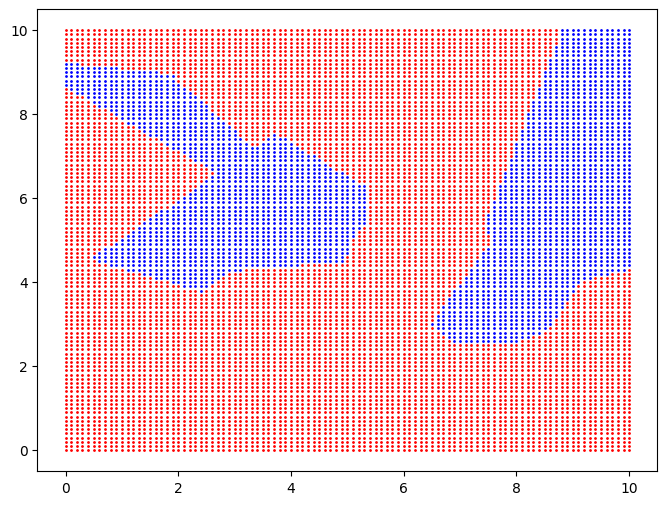

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to generate random training data
def generate_train_data(seed=42, size=20):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size)
    Y_train = np.random.uniform(1, 10, size)
    classes_train = np.random.choice([0, 1], size=size)
    return X_train, Y_train, classes_train

# Function to generate test data grid
def generate_test_data(x_range=(0, 10.1, 0.1), y_range=(0, 10.1, 0.1)):
    x_test_range = np.arange(*x_range)
    y_test_range = np.arange(*y_range)
    X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
    X_test_flat = X_test.ravel()
    Y_test_flat = Y_test.ravel()
    return X_test_flat, Y_test_flat

# Function to create train and test data arrays
def create_data_arrays(X_train, Y_train, X_test_flat, Y_test_flat):
    train_data = np.column_stack((X_train, Y_train))
    test_data = np.column_stack((X_test_flat, Y_test_flat))
    return train_data, test_data

# Function to plot KNN classification results
def plot_knn_classification(k, train_data, classes_train, X_test_flat, Y_test_flat, test_data):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes_train)

    predicted_classes = knn.predict(test_data)

    plt.figure(figsize=(8, 6))

    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0],
                color='blue', label='Class 0 (Blue)', s=1)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1],
                color='red', label='Class 1 (Red)', s=1)

    plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0],
                color='blue', edgecolor='black', label='Training Class 0', marker='o', s=100)
    plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1],
                color='red', edgecolor='black', label='Training Class 1', marker='o', s=100)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'KNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to coordinate the process
def main():
    X_train, Y_train, classes_train = generate_train_data(seed=42, size=20)
    X_test_flat, Y_test_flat = generate_test_data(x_range=(0, 10.1, 0.1), y_range=(0, 10.1, 0.1))
    train_data, test_data = create_data_arrays(X_train, Y_train, X_test_flat, Y_test_flat)

    k_values = [1, 3, 5, 7, 9]
    for k in k_values:
        plot_knn_classification(k, train_data, classes_train, X_test_flat, Y_test_flat, test_data)

# Example usage
main()
